# Знакомство с преобразованием фурье

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.fft import fft, fftshift


In [12]:
T = 4
Fd = 512 # Частота дискретизации
A0 = 0.5
F1 = 10
A1 = 1
Phi1 = 90
F2 = 30
A2 = 0.8
Phi2 = 0
Anoise = 0.3
N = 512//2 # Число отсчетов для построения спектра

In [13]:
# Создаем массив отсчетов времени
t = np.linspace(0, T, Fd*T)

# Создаем сигнал из двух синусоид и постоянной составляющей
x = A0 + A1*np.sin(F1*2.0*np.pi*t) + A2*np.sin(F2*2.0*np.pi*t+Phi2)

#Построение спектра

1. Спектр сигнала показывает какая частота с какой амплитудой присутствует в сигнале.
Частоты могут быть как положительные так и отрицательные.
Алгоритм БПФ возвращает вектор значений не совсем в обычной последовательности,
сначала идут положительные частоты [0, max], а затем отрицательные [-max, 0).
Чтобы сделать нормальную последовательность есть метод **fftshift**.

2. **Спектр вещественного сигнала** симметричный, поэтому обычно анализируют лишь положительную часть спектра.

3. Результат БПФ не содержит **нормировочный коеффициент** 1/N.

4. **Сила сигнала.** Амплитуда "размазывается" по положительным и отрицательным частотам, поэтому все значения, кроме нулевого, надо домножить на 2.

5. **Исключение постоянной составляющей.**
Прежде чем вычислять спектр сигнала необходимо из него вычесть среднее значение, в противном случае нулевая частота может иметь большое значение амплитуды и тем самым "испортить" соседние частоты.


###Виды спектров

* Комплексный **a+*i*b**
* Частотный **a**
* Фазовый   **b**
* Амплитудный |c|=$\sqrt{a^2+b^2}$
* Спектр мощности ||c|| = |c|=$a^2+b^2$

In [14]:
x = x - x.mean()
XX = fft(x, N)
X = 2/N * np.abs(XX[0:N//2])
X[0] = X[0]/2

###Частоты
6.Соглано теореме Котельникова (Найквиста-Шеннона) Максимальная частота, которая присутствует в сигнале равна половине частоты дискретизации. $f_{max} = fd/2$

Теперь правильно задачим ось частот ([0, fd/2]).

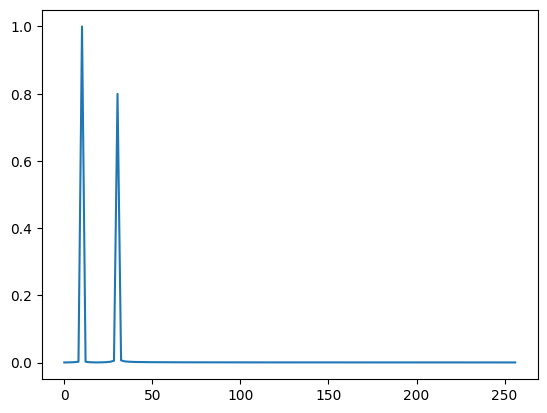

In [15]:
f = np.linspace(0, Fd//2, N//2)
plt.plot(f, X)

Еще часто переходят от амплитуды к громкости в децибелах.

In [10]:
# Переходим к громкости в Децебелах
Xdb = 20*np.log10(X)